# MICROSOFT-MOVIE PROJECT



## BUSINESS UNDERSTANDING




Microsoft has been enchanted by the big companies creating original video content and now wants to get in on the fun. They have already established a movie studio but have little knowledge of what it entails to really hit the ground running in the film industry. Fortunatly, we have some data sets which will be analyzed in order to come up with some valuable insights which will be used to make executive desicions. Therefore, analysis includes data from the following sources:


1. Box Office Mojo
2. IMDB
3. The Numbers


###  Import  libraries for data analysis, database connection and visualization

In [5]:
# importing libraries 

import pandas as pd 

import sqlite3

import matplotlib.pyplot as plt

import seaborn as sns

### Step 1: Importing the IM.DB database and understanding the data

In [6]:
# unzipping file

import zipfile
with zipfile.ZipFile("zippedData/im.db.zip","r") as zip_ref:
    zip_ref.extractall("zippedData/")

In [7]:
# creating a connection to the database
conn = sqlite3.connect('zippedData/im.db')  
cur = conn.cursor()
cur.execute("""
            SELECT name
            FROM sqlite_master
            WHERE type = 'table'
            ;
            """
           )
tables = cur.fetchall()
tables # checking the tables in the database

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

We can see we have a couple of tables but our focus would be on 'movie_basics' and 'movie_ratings'


In [8]:
# Reading and reviewing the first(5) rows of  IM.DB 'movie_ratings' table
pd.read_sql("""
SELECT *
FROM movie_ratings;""", conn).head() 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
# Reading and reviewing the first(5) rows of  IM.DB 'movie_basics' table
pd.read_sql("""
SELECT *
FROM movie_basics;""", conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [18]:
# Joined movie_ratings and  movie_basics tables
movie_rating_basics = pd.read_sql("""SELECT *
FROM movie_ratings
JOIN movie_basics
USING (movie_id)""",conn)
movie_rating_basics

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [17]:
# checking the first five rows of the data

movie_rating_basics.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [16]:
# checking on the data types and missing values in the dataframe

movie_rating_basics.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [12]:
# Null values
movie_rating_basics.isnull().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

Lets begin cleaning our data

In [15]:
#shape of movie rating basics which is 'table'
movie_rating_basics.shape

(73856, 8)

In [19]:
# Filling missing values in genres column 
movie_rating_basics.genres.fillna('Missing', inplace=True)
movie_rating_basics

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [20]:
#dropping remaining null values
movie_rating_basics.dropna(inplace = True)
movie_rating_basics.isnull().sum()

movie_id           0
averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [21]:
#checking for duplicates
movie_rating_basics.duplicated(keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
73849    False
73851    False
73852    False
73854    False
73855    False
Length: 66236, dtype: bool

In [22]:
movie_rating_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   averagerating    66236 non-null  float64
 2   numvotes         66236 non-null  int64  
 3   primary_title    66236 non-null  object 
 4   original_title   66236 non-null  object 
 5   start_year       66236 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           66236 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


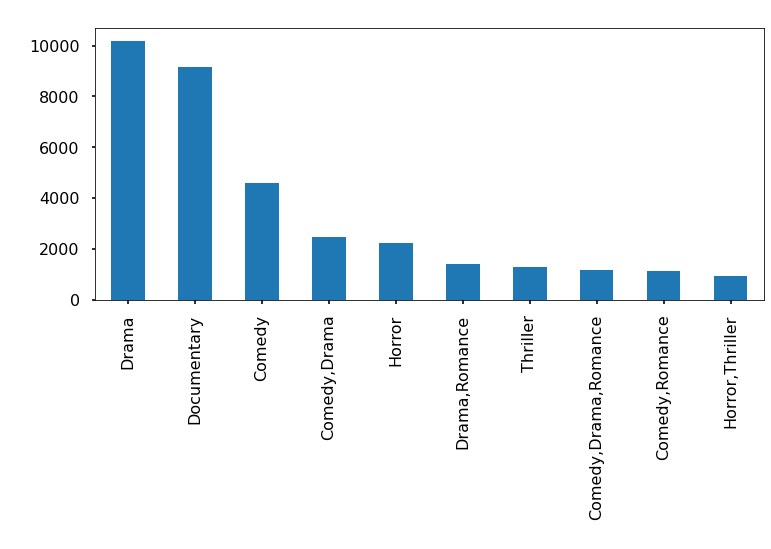

In [106]:
# Plotting a bar graph for the value counts of genre
fig,ax = plt.subplots(figsize = (12,5))
movie_rating_basics.genres.value_counts().head(10).plot.bar()
plt.xlabel("Genres",c = "w")
plt.ylabel("Frequency",c ="w")
plt.title("Value Count",color= "w");

plt.savefig('valuecount.png')

## Finding out how does the runtime of a film affect its average rating

In [24]:
# combining the movie_basics table with the movie_ratings table using the movie_id column
table = pd.read_sql("""
SELECT averagerating, primary_title, genres, runtime_minutes
FROM movie_ratings 
JOIN movie_basics 
    USING(movie_id);""",conn)

In [25]:
# checking the first five rows of the data
table.head()

,averagerating,primary_title,genres,runtime_minutes
0,8.3,Laiye Je Yaarian,Romance,117.0
1,8.9,Borderless,Documentary,87.0
2,6.4,Just Inès,Drama,90.0
3,4.2,The Legend of Hercules,"Action,Adventure,Fantasy",99.0
4,6.5,Até Onde?,"Mystery,Thriller",73.0


In [26]:
# checking on the data types and missing values in the dataframe
table.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    73856 non-null  float64
 1   primary_title    73856 non-null  object 
 2   genres           73052 non-null  object 
 3   runtime_minutes  66236 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.3+ MB


In [27]:
# descriptive statistics
table.describe()  

,averagerating,runtime_minutes
count,73856.000000,66236.000000
mean,6.332729,94.654040
std,1.474978,208.574111
min,1.000000,3.000000
25%,5.500000,81.000000
50%,6.500000,91.000000
75%,7.400000,104.000000
max,10.000000,51420.000000


In [28]:
# assigning it to an variable and dropping missing values 
table = table.dropna() 

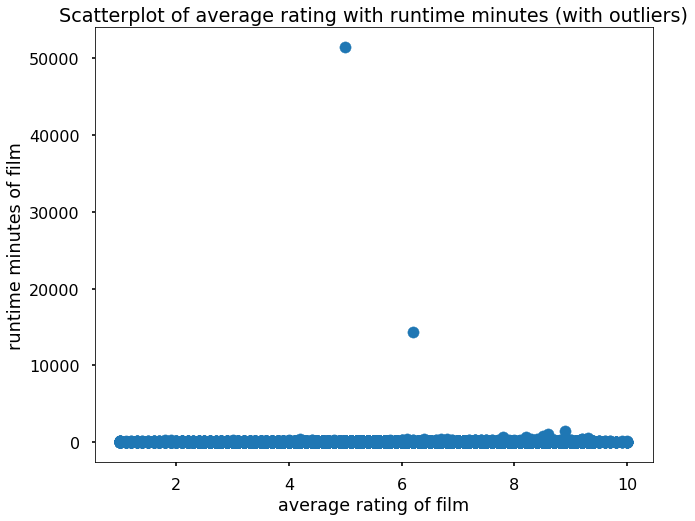

<Figure size 921.6x633.6 with 0 Axes>

In [107]:
# data visualization
plt.figure(figsize=(10,8))
plt.scatter(table.averagerating, table.runtime_minutes)
plt.xlabel("average rating of film")
plt.ylabel('runtime minutes of film')
plt.title('Scatterplot of average rating with runtime minutes (with outliers)')
plt.show();
plt.savefig('Average_rating_runtime_scaterplot.png')
plt.savefig('foo.pdf')

In [31]:
# finding more about the outliers
table.loc[table['runtime_minutes'] > 10000]  

,averagerating,primary_title,genres,runtime_minutes
12828,6.2,Modern Times Forever,Documentary,14400.0
44210,5.0,Logistics,Documentary,51420.0


After plotting the scatterplot, there was an obvious case of outliers. A closer look at these revealed that they indeed were real films which had records for being among the longest movies to be ever produced. Although this is absurd, it is expected that documentaries will have a longer runtime_minutes than other films

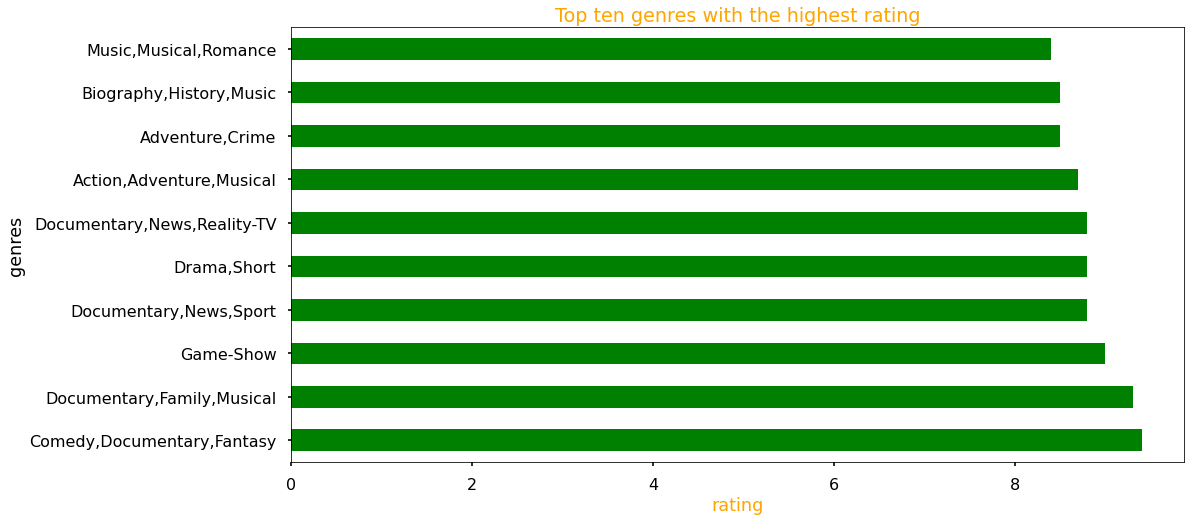

In [108]:
# grouping by genre
rating = table.groupby('genres')['averagerating'].mean().sort_values(ascending=False)  
# data visualization
ax = rating.iloc[0:10].plot.barh(color="green",figsize=(16,8))
ax.set_xlabel('rating',c="orange")
ax.set_title('Top ten genres with the highest rating',c="orange");
plt.savefig('ten_genres_with_highest_ratings.png')

The barplot above points out to a particular trend where cross-genre documentaries, reality_tv, history, sport, drama and game-show attract a high rating. Of particular focus is the documentary genre which seems to be popular with many. This could be the case because documentaries talk about real people, real events and occasions which can resonate with people easily.

# Step 2: Importing the movie_info dataset and understanding the data

Let's find the dataset columns

In [92]:
# reading in the data 
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter="\t" , encoding = 'latin1')

In [93]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


 Special focus will be given to genre and box_office revenue to investigate which genres make more money at the box_office

In [94]:
# checking data types and missing values
movie_info.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [95]:
# descriptive statistics
movie_info.describe() 

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [96]:
# dropping all missing values
movie_info = movie_info.dropna() 

In [97]:
# drop any duplicated rows
movie_info = movie_info.drop_duplicates()

In [98]:
# converting box_office to float
Box_office = movie_info['box_office'].str.replace(',', '').astype(float)

In [99]:
# creating a dataframe 
df = pd.DataFrame(Box_office) 

##  Which are the top ten highest earning genres in the boxoffice?

In [100]:
# binding box_office float to the other dataframe
genre_boxoffice = pd.concat([movie_info, df], axis=1) 

In [101]:
# selecting genre, box-office object and box-office float
genre_boxoffice = genre_boxoffice[['genre','box_office','box_office']]

In [102]:
# selecting columns (genre and box_office as float)
box_office = genre_boxoffice.iloc[:,[0,2]] 

In [103]:
# grouping by genre/total box_office
grouped = box_office.groupby('genre')['box_office'].sum().sort_values(ascending=False) 

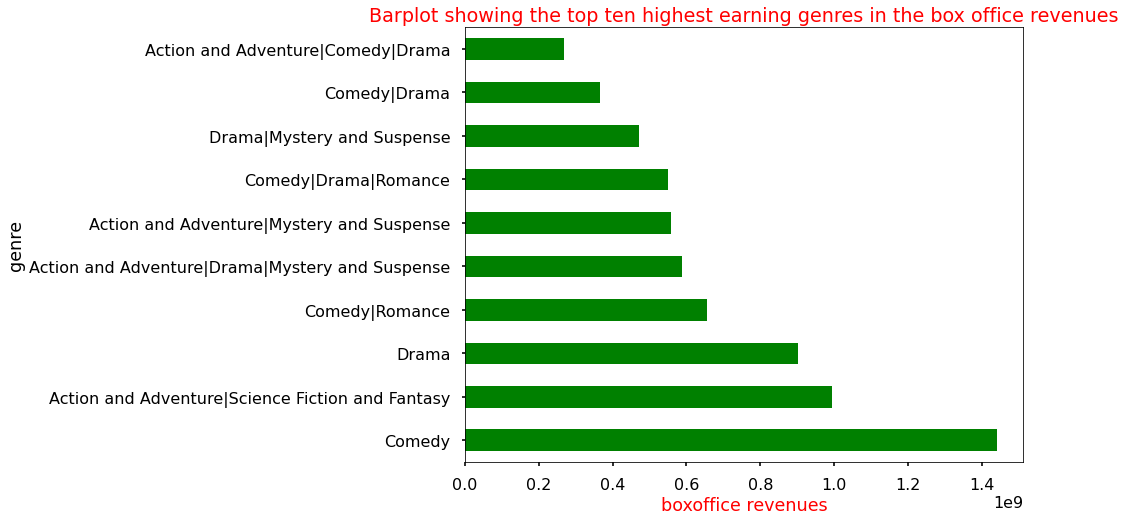

In [109]:
# first ten rows with the highest box_office revenues
ax =grouped[0:10].plot.barh(color="green",figsize=(10,8));  
ax.set_xlabel('boxoffice revenues',c="red")
ax.set_title('Barplot showing the top ten highest earning genres in the box office revenues',c="red");
plt.savefig('top_ten_companies.png')

If there one thing the barplot above communicates so loudly is that comedies are a huge hit in the box office. Humans are particularly social beings and being happy is one of the most sought after feelings. Laughter is infectious and so are comedy films. Comedy movies make good money on the box office because they do not require huge budgets to produce and can market themselves pretty much easily as someone is likely to recommend it to someone else. Additionally, cross-genre comedies make comedy films to be so attractive as comedy can be wrapped around any plot. Following closely is drama which shares tha same characteristics with comedy films for being versartile and costing less in production. Another genre that is also reaping big profits in the box office is the mystery and suspense genre coupled with action and adventure which is also popular for its versatility and ease of intergration into other genres.

# Step 3:  Importing the bommovie dataset and understanding the data

In [39]:
# reading in the data
bommovie = pd.read_csv('zippedData/bom.movie_gross.csv.gz')  

In [40]:
# checking the first rows of the data
bommovie.head()  

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [41]:
# checking structure and missing values
bommovie.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [42]:
# descriptive statistics
bommovie.describe() 

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


## Data preparation and cleaning

In [43]:
# checking for any missing values in the columns 
bommovie.isnull().any() 

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [44]:
# checking the amount of missing values for each of the columns 
bommovie.isnull().sum() 

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [45]:
# dropping all missing values
bommovie_clean = bommovie.dropna()  

In [46]:
# checking on the structure of the new data. 
bommovie_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [47]:
# descriptive statistics of the dataset
bommovie_clean.describe() 

,domestic_gross,year
count,2.007000e+03,2007.000000
mean,4.701984e+07,2013.506228
std,8.162689e+07,2.597997
min,4.000000e+02,2010.000000
25%,6.700000e+05,2011.000000
50%,1.670000e+07,2013.000000
75%,5.605000e+07,2016.000000
max,9.367000e+08,2018.000000


In [48]:
# dropping any duplicated rows
bommovie_clean = bommovie_clean.drop_duplicates()

### Converting Columns to float type

In [49]:
# converting foreign gross to float
foreign_gross_float = bommovie_clean['foreign_gross'].str.replace(',', '').astype(float) 

In [50]:
# convert from series to dataframe
df_foreign = pd.DataFrame(foreign_gross_float)  

In [51]:
# join the two dataframes
bommovie_clean = pd.concat([bommovie_clean, df_foreign], axis=1) 

In [52]:
# select foreign_gross as float and drop foreign_gross as object
bommovie_clean = bommovie_clean.iloc[:,[0,1,2,4,5]]  

In [53]:
# check the new dataframe's col types
bommovie_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   year            2007 non-null   int64  
 4   foreign_gross   2007 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


### Creating a new column total_gross = domestic_gross + foreign_gross

In [55]:
# creating a new column 'foreign_gross'
bommovie_clean['total gross'] = bommovie_clean['domestic_gross'] + bommovie_clean['foreign_gross']
bommovie_clean.head()

,title,studio,domestic_gross,year,foreign_gross,total gross
0,Toy Story 3,BV,415000000.0,2010,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,2010,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,664300000.0,9.603000e+08
3,Inception,WB,292600000.0,2010,535700000.0,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,2010,513900000.0,7.526000e+08


In [58]:
# ninetieth percentile
ninetieth_quantile = bommovie_clean['domestic_gross'].quantile(0.9)   

In [59]:
# studios in the ninetieth percentile
top_domestic_films = bommovie_clean.loc [bommovie_clean['domestic_gross'] > ninetieth_quantile]

## Analyzing the best performing companies in the industry

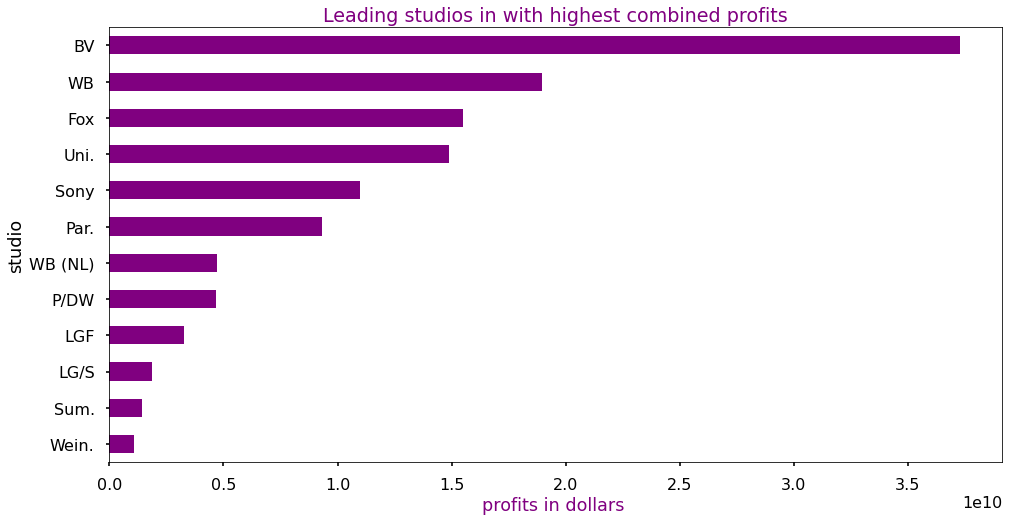

In [110]:
#data visualization
ax = top_domestic_films.groupby("studio")['total gross'].agg('sum').sort_values().plot.barh(color="purple",figsize=(16,8))
ax.set_title("Leading studios in with highest combined profits",c="purple");
ax.set_xlabel("profits in dollars ",c="purple");
plt.savefig('leading_studios.png')

The chart above shows us the overall best performing companies in the film industry

Currently, the big names who are raking in the profits include:

1. Buena Vista studios a subsidiary of Walt Sidney studios
2. Warner Bros
3. Universal studios
4. Fox studios
5. Sony pictures
6. Paramount pictures
7. Lions Gate
8. Dream Work pictures

## Now lets compare between the foreign and domestic market

In [81]:
# average profits in the domestic market
bommovie_clean['domestic_gross'].mean() 

47019840.20179372

In [85]:
# average profits in the foreign market
bommovie_clean['foreign_gross'].mean() 

75790384.84130543

In [86]:
# creating a dataframe 
market= ['domestic','foreign']
average_profits = [47019840.20179372, 75790384.84130543]
zipped = list(zip(market,average_profits))
df = pd.DataFrame(zipped, columns=['market', 'average_profits ']) 

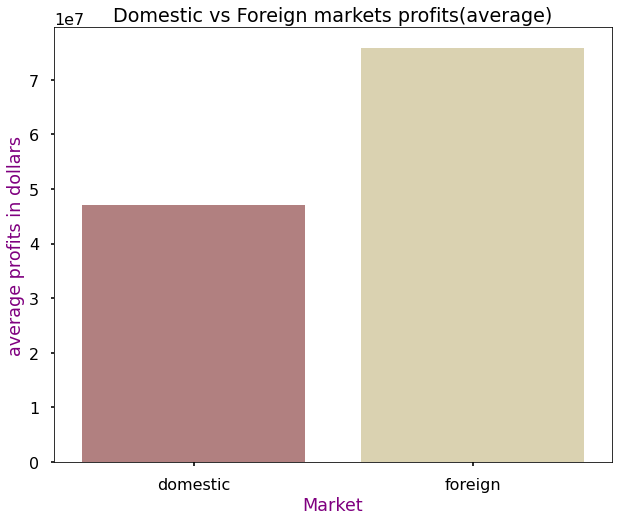

In [89]:
# data visualization
plt.figure(figsize=(10,8))
ax =sns.barplot(x=market,y=average_profits, data= df,palette='pink')
ax.set_title("Domestic vs Foreign markets profits(average)")
ax.set_ylabel("average profits in dollars",c="purple")
ax.set_xlabel("Market",c="purple");
